<a href="https://colab.research.google.com/github/sanjaynam/NueralNet/blob/master/Cardio_paper_physio_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Paper for Conference 

keywords: cardio,ecg one class classifier

Sub project: Replication of reults from Physionet Challenge 2017

Citation:
Andreotti, F., Carr, O., Pimentel, M.A.F., Mahdi, A., & De Vos, M. (2017). Comparing Feature Based Classifiers and Convolutional Neural Networks to Detect Arrhythmia from Short Segments of ECG. In Computing in Cardiology. Rennes (France).

Reference 
> Challenge: https://www.physionet.org/challenge/2017/papers/
> Git: https://github.com/fernandoandreotti/cinc-challenge2017
> Paper : http://www.cinc.org/archives/2017/pdf/360-239.pdf

In [0]:
# Download some random waveform from challenge database
from random import randint
import urllib.request
record = "A{:05d}".format(randint(0, 999))
urlfile = "https://www.physionet.org/physiobank/database/challenge/2017/training/A00/{}.mat".format(record)
local_filename, headers = urllib.request.urlretrieve(urlfile)
html = open(local_filename)
print('Downloading record {} ..'.format(record))

In [0]:
# Load data
import scipy.io
mat_data = scipy.io.loadmat(local_filename)
data = mat_data['val']

# Parameters
FS = 300
maxlen = 30*FS
classes = ['A', 'N', 'O','~']

# Preprocessing data
print("Preprocessing recording ..")    
import numpy as np
X = np.zeros((1,maxlen))
data = np.nan_to_num(data) # removing NaNs and Infs
data = data[0,0:maxlen]
data = data - np.mean(data)
data = data/np.std(data)
X[0,:len(data)] = data.T # padding sequence
data = X
data = np.expand_dims(data, axis=2) # required by Keras
del X

Preprocessing recording ..


In [0]:
# Importing model in Colab from local machine

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ResNet_30s_34lay_16conv.hdf5 to ResNet_30s_34lay_16conv.hdf5
User uploaded file "ResNet_30s_34lay_16conv.hdf5" with length 10604536 bytes


In [0]:
# Load and apply model
print("Loading model")    
from keras.models import load_model
model = load_model('ResNet_30s_34lay_16conv.hdf5')

Loading model
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
print("Applying model ..")    
prob = model.predict(data)
ann = np.argmax(prob)
print("Record {} classified as {} with {:3.1f}% certainty".format(record,classes[ann],100*prob[0,ann]))

Applying model ..
Record A00730 classified as O with 62.3% certainty


Text(0.5, 1.0, 'Input signal')

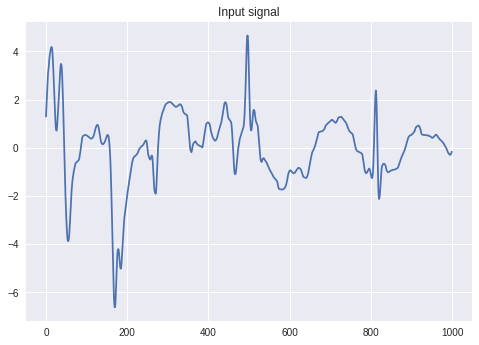

In [0]:
# Visualising output of first 16 convolutions for some layers
from keras import backend as K
import matplotlib.pyplot as plt
plt.plot(data[0,0:1000,0],)
plt.title('Input signal')
#plt.savefig('layinput.eps', format='eps', dpi=1000) # saving?


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


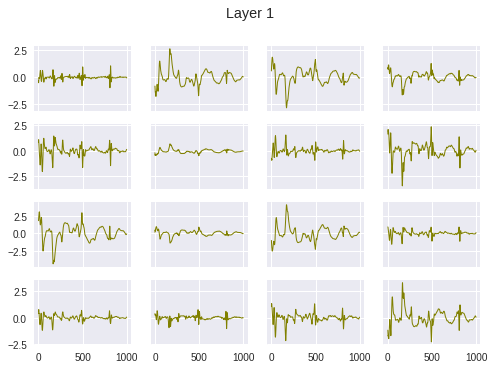

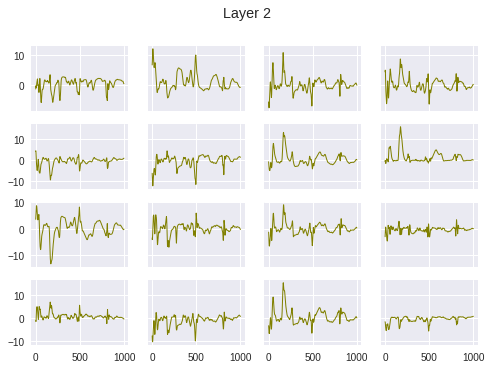

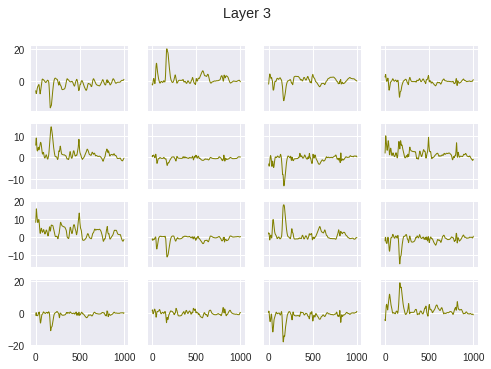

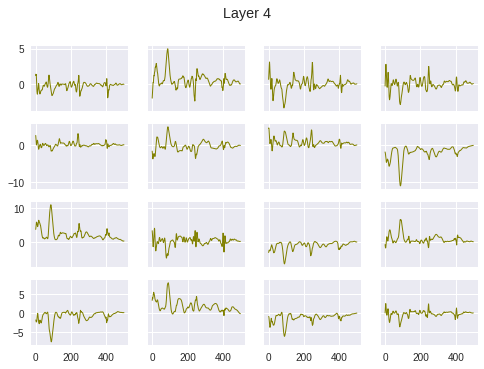

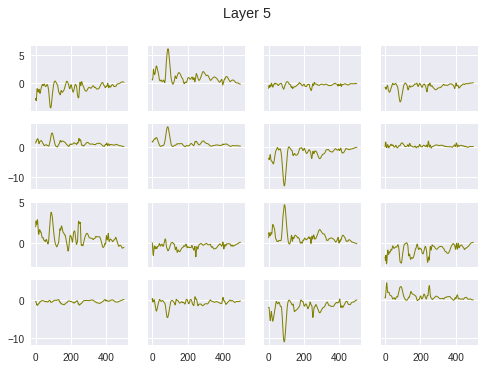

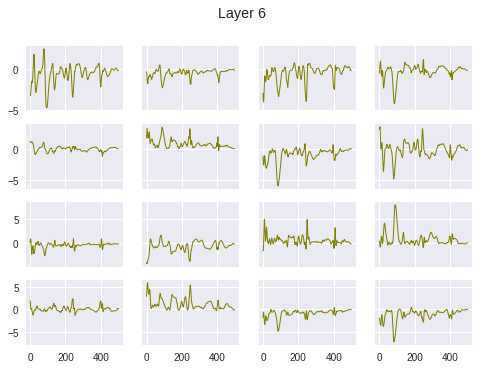

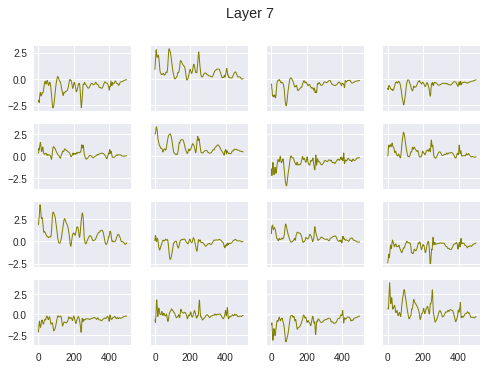

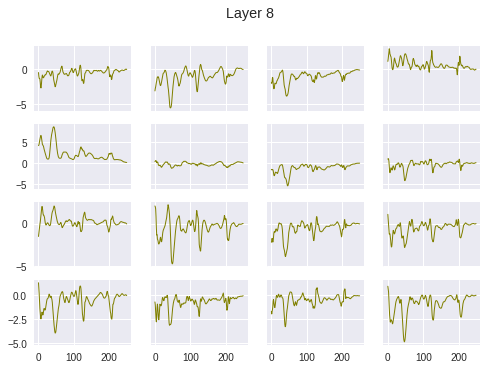

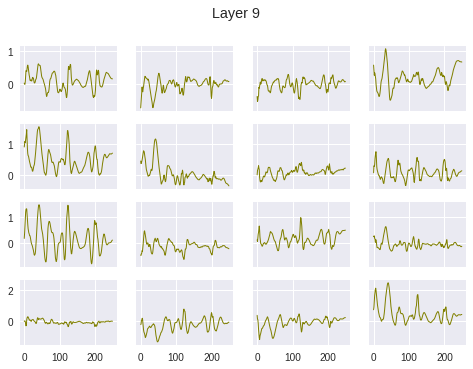

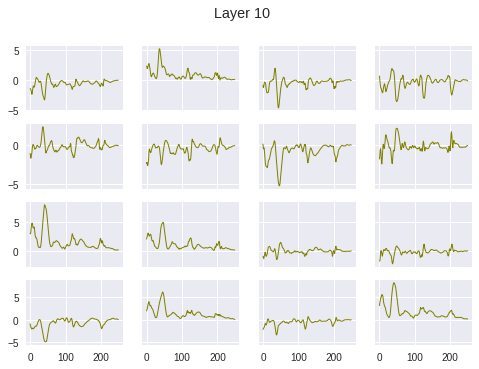

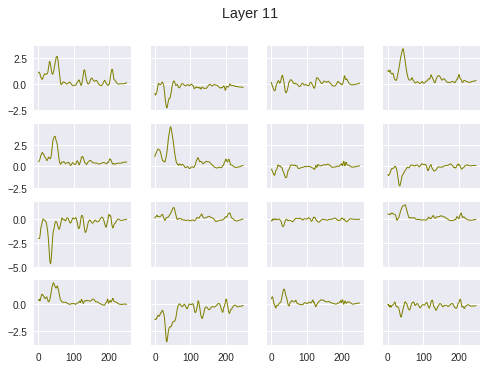

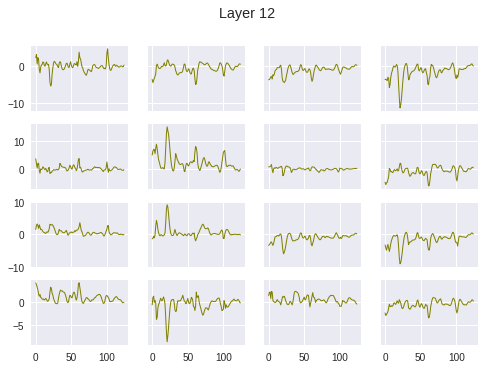

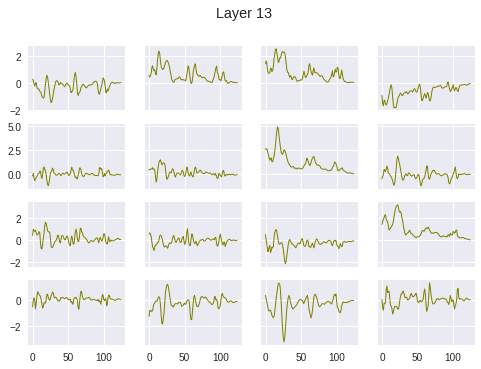

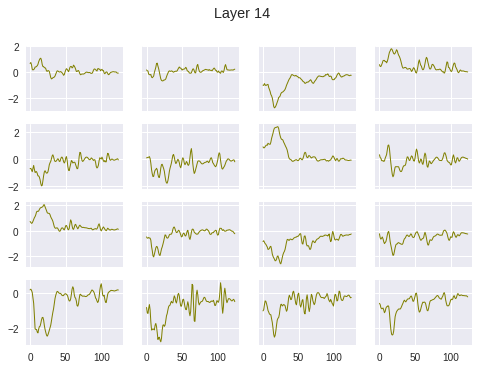

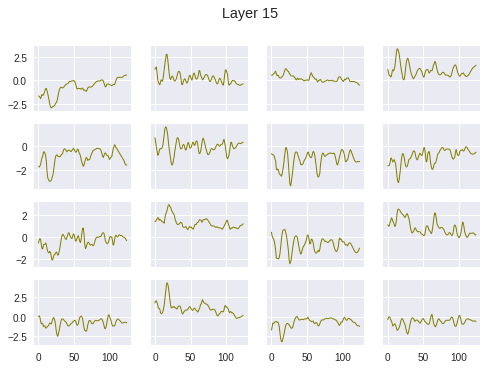

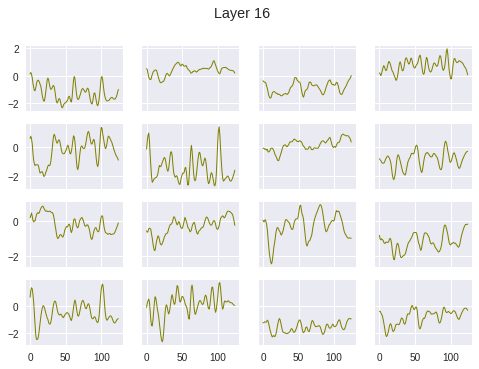

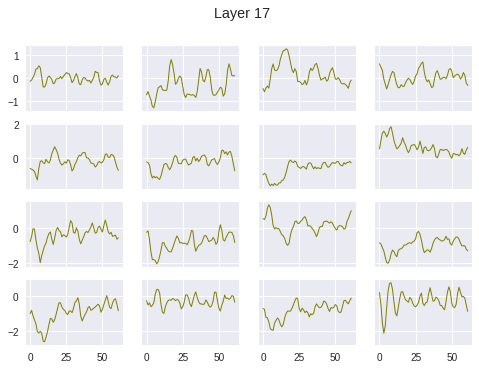

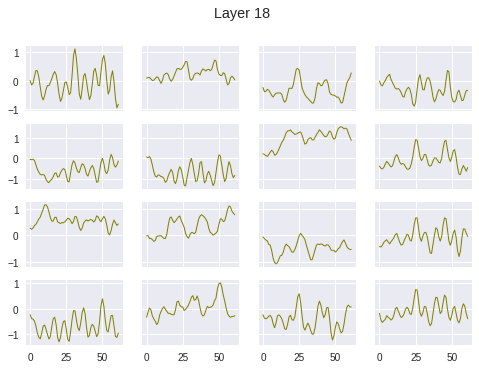

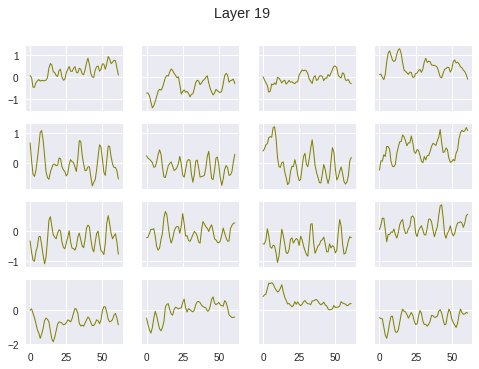

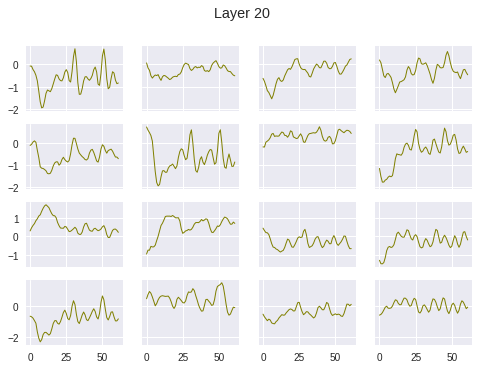

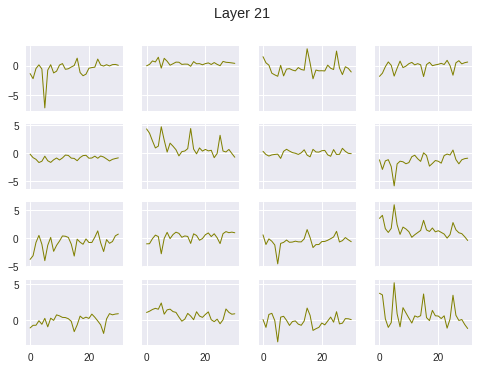

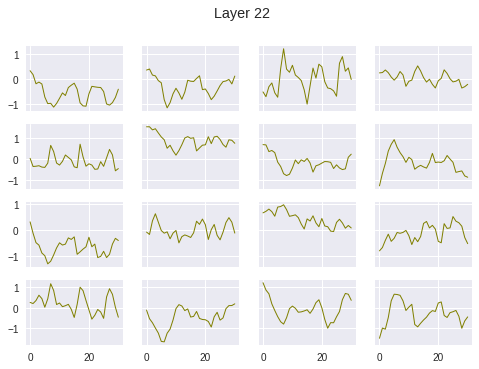

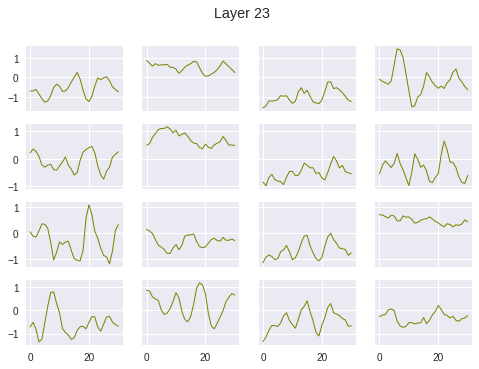

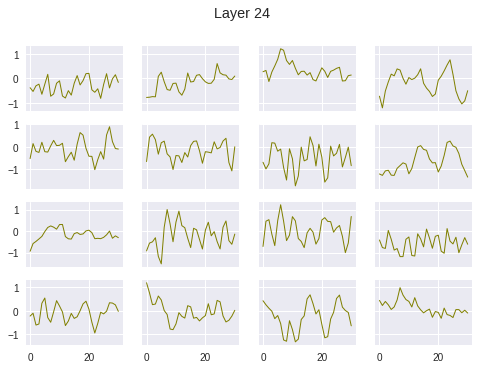

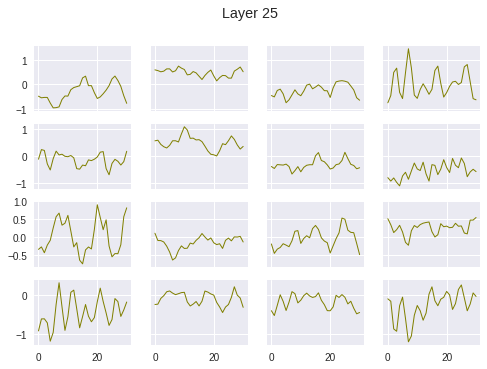

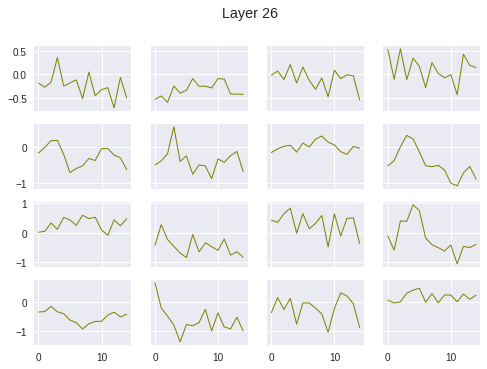

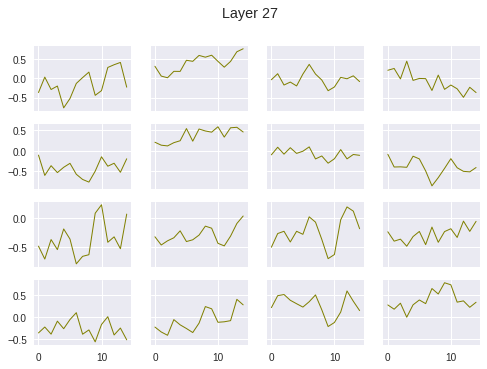

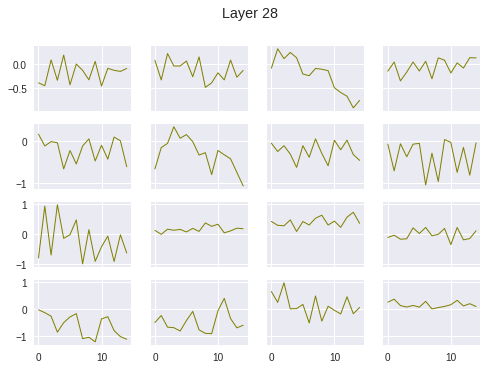

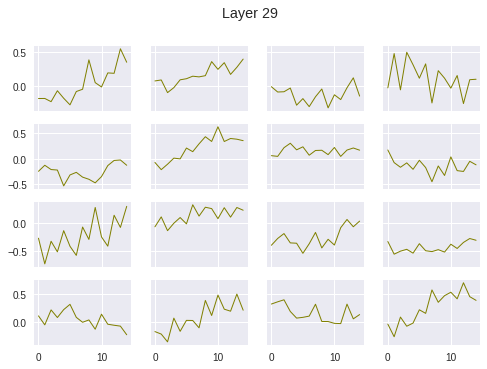

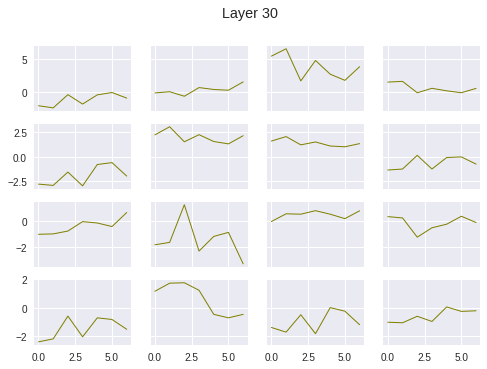

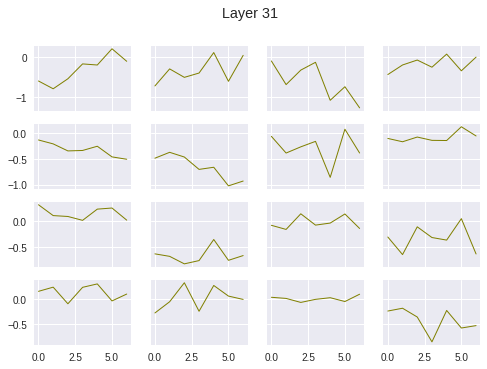

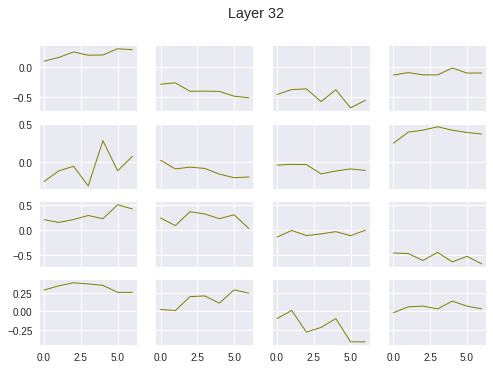

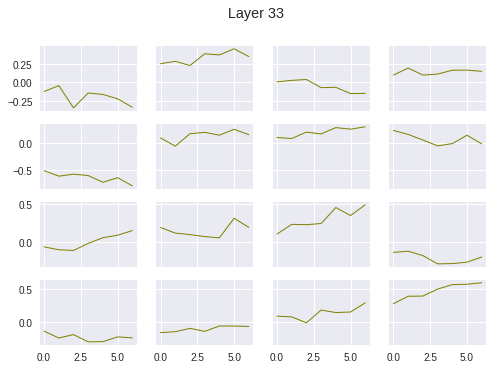

In [0]:
for l in range(1,34):#range(1,34):
    Np = 1000
    ## Example of plotting first layer output
    layer_name = 'conv1d_{}'.format(l)
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    
    # K.learning_phase() is a flag that indicates if the network is in training or
    # predict phase. It allow layer (e.g. Dropout) to only be applied during training
    get_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                   [layer_output])
    filtout = get_layer_output([data,0])[0]
    Npnew = int(Np*filtout.shape[1]/data.shape[1])
    fig, ax = plt.subplots(nrows=4, ncols=4, sharex='col', sharey='row')    
    count = 0
    for row in ax:
        for col in row:
            col.plot(range(Npnew), filtout[0,0:Npnew,count],linewidth=1.0,color='olive')
            count += 1
    plt.suptitle('Layer {}'.format(l))
    #plt.savefig('layoutput{}.eps'.format(l), format='eps', dpi=1000) # saving?